In [199]:
!python --version

Python 3.12.7


In [201]:
!python -m pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [1]:
import pandas as pd

In [3]:
import numpy as np

In [5]:
import matplotlib.pyplot as plt

In [7]:
import tensorflow as tf

In [25]:
from sklearn.preprocessing import LabelEncoder

In [31]:
from sklearn.feature_extraction.text import CountVectorizer

In [61]:
from sklearn.model_selection import train_test_split

In [45]:
from tensorflow.keras import Sequential

In [47]:
from tensorflow.keras.layers import Dense, Input

In [9]:
df = pd.read_csv("../../../dados/nlp/imdb-reviews-pt-br.csv", encoding="utf-8")

In [19]:
df["sentimento_numero"] = df["sentiment"].replace(to_replace=['neg', 'pos'], value=[0, 1], inplace=False)

C:\Users\anton\AppData\Local\Temp\ipykernel_24900\1312190411.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["sentimento_numero"] = df["sentiment"].replace(to_replace=['neg', 'pos'], value=[0, 1], inplace=False)


In [70]:
count_vectorizer = CountVectorizer(max_features = 2000)

In [72]:
X_encoded = count_vectorizer.fit_transform( df["text_pt"] )
X_encoded

<49459x2000 sparse matrix of type '<class 'numpy.int64'>'
	with 4684329 stored elements in Compressed Sparse Row format>

In [74]:
vocabulario = count_vectorizer.get_feature_names_out()
vocabulario

array(['000', '10', '100', ..., 'única', 'único', 'únicos'], dtype=object)

In [76]:
MAX_PALAVRAS = len(vocabulario)
MAX_PALAVRAS

2000

In [114]:
Y = df["sentimento_numero"].astype(float)

In [123]:
X_sparsed = pd.DataFrame.sparse.from_spmatrix(  X_encoded, columns=vocabulario ).astype(float)
X_sparsed

,000,10,100,11,12,13,15,20,30,40,...,ótima,ótimas,ótimo,ótimos,última,último,últimos,única,único,únicos
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49454,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49455,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49456,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
49457,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [125]:
X_train, X_test, Y_train, Y_test = train_test_split(X_sparsed, Y, random_state=100)

In [126]:
modelo = Sequential()
modelo.add( Input( (MAX_PALAVRAS,) ) )
modelo.add( Dense( 256, activation = "relu" ) )
modelo.add( Dense( 32, activation = "relu" ) )
modelo.add( Dense( 1, activation = "sigmoid" ) )
modelo.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_25 (Dense)                     │ (None, 256)                 │         512,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 32)                  │           8,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 520,513 (1.99 MB)

 Trainable params: 520,513 (1.99 MB)

 Non-trainable params: 0 (0.00 B)

In [129]:
modelo.compile( optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [131]:
historico = modelo.fit(X_train, Y_train, epochs=20)

Epoch 1/20
1160/1160 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8117 - loss: 0.4172
Epoch 2/20
1160/1160 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.8893 - loss: 0.2630
Epoch 3/20
1160/1160 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.9330 - loss: 0.1714
Epoch 4/20
1160/1160 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.9740 - loss: 0.0736
Epoch 5/20
1160/1160 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9874 - loss: 0.0387
Epoch 6/20
1160/1160 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.9892 - loss: 0.0303
Epoch 7/20
1160/1160 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9926 - loss: 0.0211
Epoch 8/20
1160/1160 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9947 - loss: 0.0163
Epoch 9/20
1160/1160 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9955 - loss: 0.0134
Epoch 10/20
1160/1160 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9953 - loss: 0.0157
Epoch 11/20
1160/1160 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9981 - loss: 0.0056
Epoch 12/20
1160/1160 ━━━━━━━

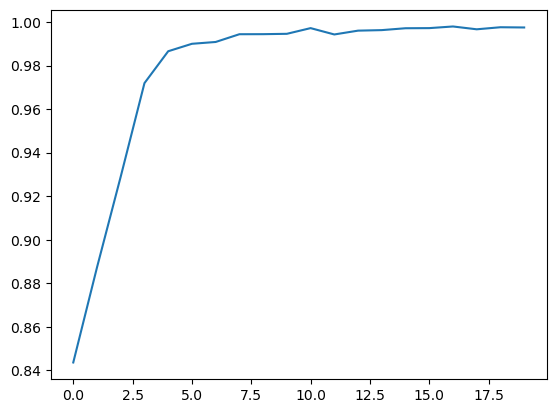

In [139]:
plt.plot(historico.history['accuracy'])

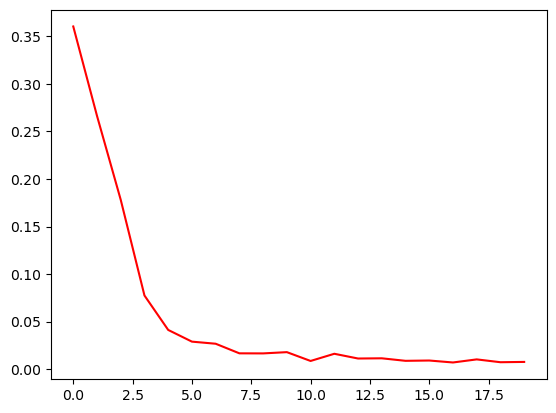

In [141]:
plt.plot(historico.history['loss'], color="red")

In [147]:
modelo.evaluate( X_test, Y_test )

387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8557 - loss: 1.0586


[1.0205261707305908, 0.8606550693511963]

In [165]:
novo_vectorizer = CountVectorizer(max_features = MAX_PALAVRAS, vocabulary=vocabulario)

In [191]:
texto = "Mais um filme da branca de neve"

In [193]:
texto_encoded = novo_vectorizer.fit_transform( [texto]  )
texto_encoded.shape

(1, 2000)

In [195]:
texto_sparsed = pd.DataFrame.sparse.from_spmatrix(  texto_encoded, columns=vocabulario ).astype(float)
texto_sparsed

,000,10,100,11,12,13,15,20,30,40,...,ótima,ótimas,ótimo,ótimos,última,último,últimos,única,único,únicos
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [196]:

resultado = modelo.predict( texto_sparsed )
round(resultado[0][0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


0